In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
"""x = df['MEDV']
y = df['CRIM']

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('MEDV')
plt.ylabel('CRIM')
plt.title('Scatter Plot: MEDV vs CRIM')

# Show plot
plt.grid(True)
plt.show()"""

"x = df['MEDV']\ny = df['CRIM']\n\n# Plotting\nplt.figure(figsize=(8, 6))\nplt.scatter(x, y, color='blue', alpha=0.5)\n\n# Adding labels and title\nplt.xlabel('MEDV')\nplt.ylabel('CRIM')\nplt.title('Scatter Plot: MEDV vs CRIM')\n\n# Show plot\nplt.grid(True)\nplt.show()"

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [ ]:
x = df.drop("MEDV", axis=1) # Features (independent variables)
y = df["MEDV"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.2)

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [ ]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

In [ ]:
df=(ytrain_pred,ytrain)
df=(ytest_pred,ytest)

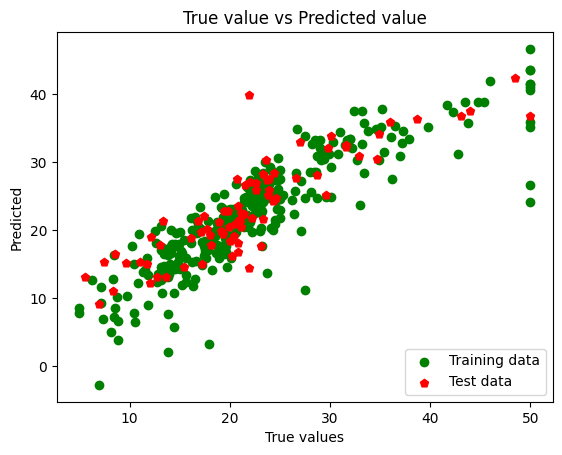

In [ ]:
plt.scatter(ytrain, ytrain_pred, c= 'Green' , marker='o' , label= 'Training data' )
plt.scatter(ytest, ytest_pred, c='red' ,marker='p' ,label='Test data')
plt.xlabel( 'True values')
plt.ylabel( 'Predicted')
plt.title('True value vs Predicted value' )
plt.legend(loc= 'lower right')
plt.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(xtest)
X_test_imputed = imputer.transform(xtest)
model.score(X_test_imputed, ytest)
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 20.28666111225875
R-squared: 0.7370577335457014


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
